The workflow is valid!


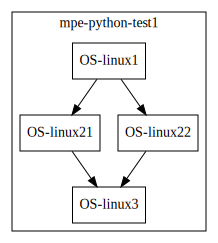

In [34]:
from ctm_python_client.core.workflow import *
from ctm_python_client.core.comm import *
from ctm_python_client.core.credential import *
from aapi import *
from ctm_python_client.ext.viz import get_graph
import os
BASE_PATH = os.path.abspath("")
with open(BASE_PATH + "/secrets", "r") as fp:
    ctm_key = fp.readline().strip()


URL='https://server:8443/automation-api'
my_environment = Environment.create_saas(URL,api_key=ctm_key)
MyCTM = "centos802"
workflow = Workflow(my_environment,
                    WorkflowDefaults(controlm_server=MyCTM,
                                     application='mpe')
                    )


Myfolder = "mpe-python-test1"
MySITE = "Site1"
Agent='centos802'
# Folder
folder = Folder(Myfolder,
                site_standard=MySITE,
                business_fields=[{'Application':'mpe'}],
                description='Test python',
                order_method=Folder.OrderMethod.Manual,
                rerun=Folder.Rerun(every='5'),
                days_keep_active='1',
                days_keep_active_if_not_ok='1'

               )
workflow.add(folder)


#  Jobs
job1 = JobCommand("OS-linux1", 
               command='/usr/bin/savegrp -G toto', 
               run_as='root',
               host=Agent
               )

job21 = JobCommand("OS-linux21", 
               command='sleep 5', 
               run_as='ctmagent',
               host=Agent)

job22 = JobCommand("OS-linux22", 
               command='date', 
               run_as='ctmagent',
               host=Agent)

job3 = JobCommand("OS-linux3", 
               command='sleep 5', 
               run_as='ctmagent',
               host=Agent)

# Dependencies
workflow.chain(
    [job1,job21,job3],inpath=Myfolder)
workflow.chain(
    [job1,job22,job3],inpath=Myfolder)

if workflow.build().is_ok():
    print('The workflow is valid!')

else:
    print('The workflow is NOT valid!')
    print(workflow.build().errors)

#workflow.dumps_json(indent=4)
get_graph(workflow)

In [35]:
if workflow.deploy().is_ok():
    print('The workflow was deployed to Control-M!')
else:
    print('The workflow is NOT deployed!')
    print(workflow.deploy().errors)

print('Run')
run = workflow.run()
run.print_statuses()

The workflow was deployed to Control-M!
Run
Run Status
--------------------------------------------------
    mpe-python-test1  ..................  Executing
    OS-linux1  .........................  Executing
    OS-linux21  ........................  Wait Condition
    OS-linux3  .........................  Wait Condition
    OS-linux22  ........................  Wait Condition



In [43]:
run.print_statuses()
run.print_output('mpe-python-test1/OS-linux1')
#run.set_to_ok('mpe-python-test1/OS-linux3')

Run Status
--------------------------------------------------
    mpe-python-test1  ..................  Wait Condition
    OS-linux1  .........................  Wait Condition
    OS-linux21  ........................  Wait Condition
    OS-linux3  .........................  Wait Condition
    OS-linux22  ........................  Wait Condition

+ /usr/bin/savegrp -G toto
/opt/emuser/ctm_agent/ctm/runtime/CMD.00000bf4_001: line 2: /usr/bin/savegrp: No such file or directory

